In [61]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datatable as dt

In [7]:
base_path = Path("./dataset")

*This dataset does not contain information about American Samoa State *

In [22]:
%%time
#loading datasets
world_agg_df = dt.fread(base_path/"time-series-19-covid-combined.csv").to_pandas().drop(["Province/State"], axis = 1)
world_agg_df.columns = ["Date", "Country", "Confirmed", "Recovered", "Death"]
us_df = dt.fread(base_path/"us_simplified.csv").to_pandas().drop(["Country/Region"], axis = 1)
us_df.columns = ["Date", "Admin", "State", "Confirmed", "Deaths"]

Wall time: 1.44 s


In [27]:
world_agg_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31
Country,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
Confirmed,0,0,0,0,0,0,0,0,0,0
Recovered,0,0,0,0,0,0,0,0,0,0
Death,0,0,0,0,0,0,0,0,0,0


In [28]:
us_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31
Admin,Autauga,Autauga,Autauga,Autauga,Autauga,Autauga,Autauga,Autauga,Autauga,Autauga
State,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama
Confirmed,0,0,0,0,0,0,0,0,0,0
Deaths,0,0,0,0,0,0,0,0,0,0


In [39]:
us_world_df = world_agg_df.query("Country ==  'US'").reset_index(drop = True).drop("Country", axis = 1)

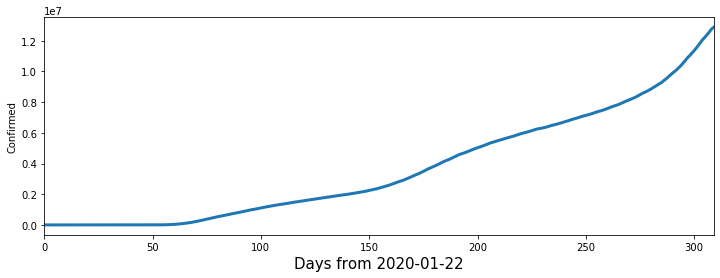

In [80]:
fig, ax = plt.subplots(figsize = (12, 4))
confirmed = pd.Series(us_world_df["Confirmed"])
ax.set_xlabel("Days from 2020-01-22", fontsize = 15)
ax.set_ylabel("Confirmed")
confirmed.plot(lw = 3)

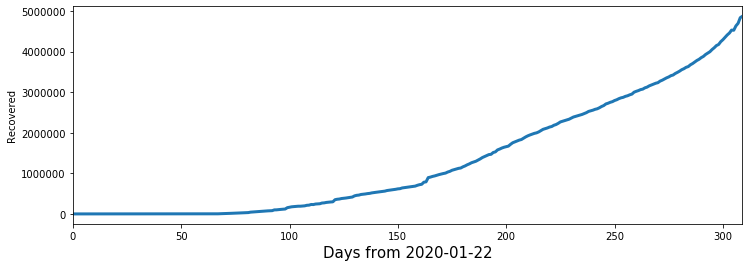

In [81]:
fig, ax = plt.subplots(figsize = (12, 4))
Recovered = pd.Series(us_world_df["Recovered"])
ax.set_xlabel("Days from 2020-01-22", fontsize = 15)
ax.set_ylabel("Recovered")
Recovered.plot(lw = 3)

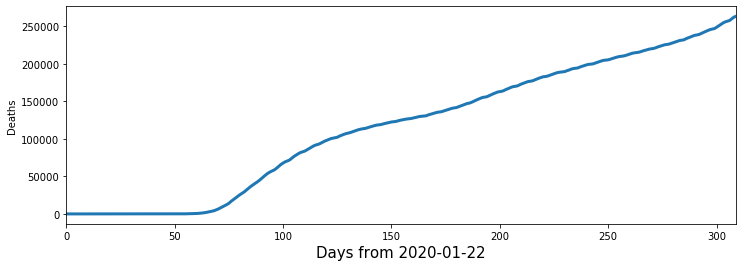

In [56]:
fig, ax = plt.subplots(figsize = (12, 4))
Deaths = pd.Series(us_world_df["Death"])
ax.set_xlabel("Days from 2020-01-22", fontsize = 15)
ax.set_ylabel("Deaths")
Deaths.plot(lw = 3)

In [57]:
confirmed, Recovered, Deaths = confirmed.to_list(),[0] + Recovered.to_list(),[0]+ Deaths.to_list()
current_infected = np.array(confirmed) - np.array(Recovered[:len(confirmed)]) - np.array(Deaths[:len(confirmed)])

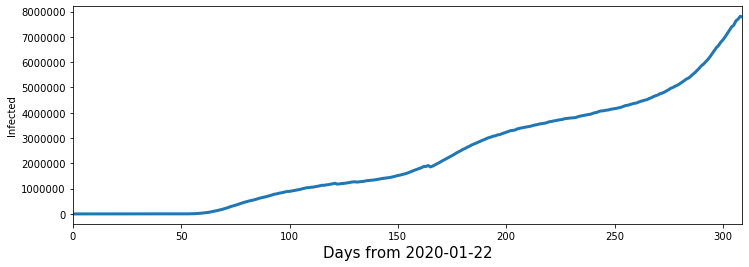

In [68]:
fig, ax = plt.subplots(figsize = (12, 4))
current_infected = pd.Series(current_infected)
ax.set_xlabel("Days from 2020-01-22", fontsize = 15)
ax.set_ylabel("Infected")
current_infected.plot(lw = 3)

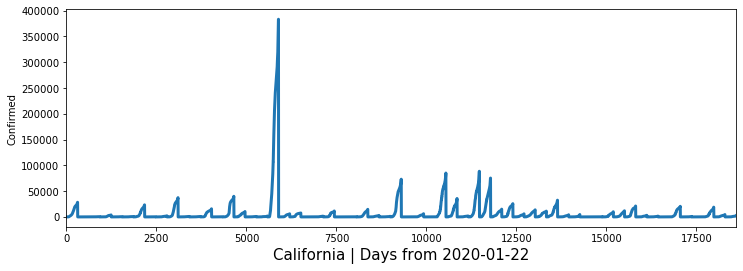

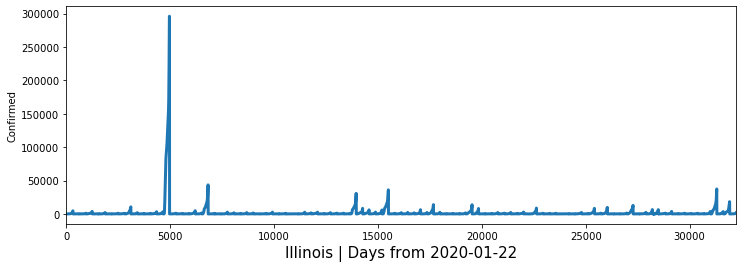

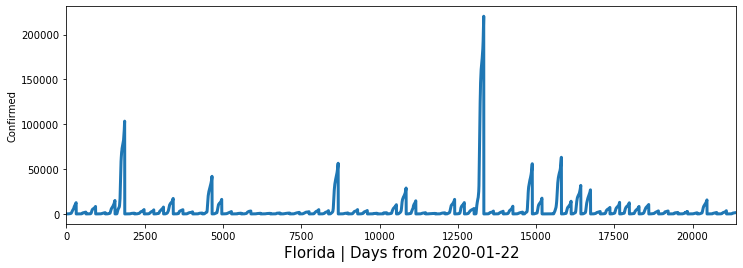

In [93]:
states = list(us_df["State"].unique())
m = {}
for state in states:
    m[state] = us_df.query(f"State == '{state}'")["Confirmed"].max()
m = dict(sorted(m.items(), key=lambda item: item[1]))

States_with_highest_Confirmed_Cases = ["California", "Illinois", "Florida"]
for state in States_with_highest_Confirmed_Cases:
    fig, ax = plt.subplots(figsize = (12, 4))
    confirmed = pd.Series(us_df.query(f"State == '{state}'").reset_index(drop = True)["Confirmed"])
    ax.set_xlabel(f"{state} | Days from 2020-01-22", fontsize = 15)
    ax.set_ylabel("Confirmed")
    confirmed.plot(lw = 3)

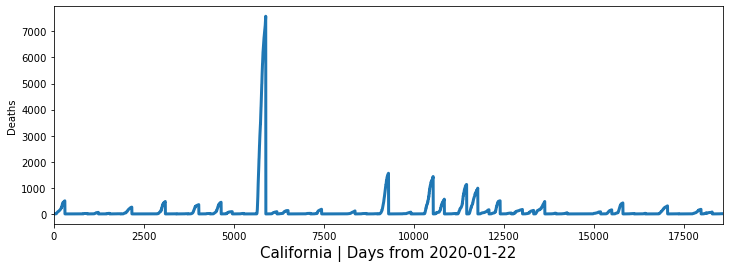

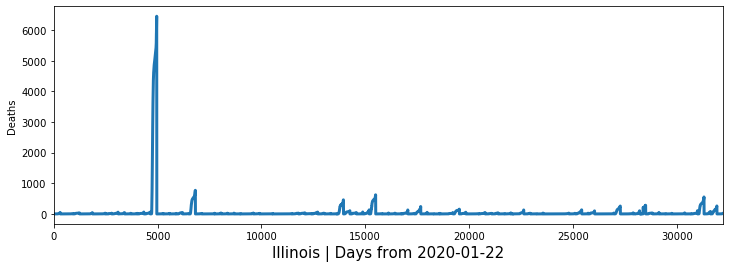

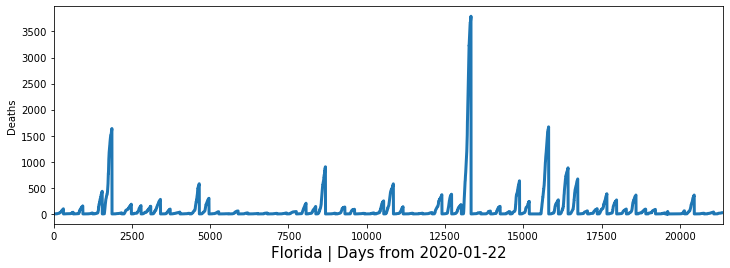

In [95]:
states = list(us_df["State"].unique())
m = {}
for state in states:
    m[state] = us_df.query(f"State == '{state}'")["Deaths"].max()
m = dict(sorted(m.items(), key=lambda item: item[1]))

States_with_highest_Deaths_Cases = ["California", "Illinois", "Florida"]
for state in States_with_highest_Deaths_Cases:
    fig, ax = plt.subplots(figsize = (12, 4))
    confirmed = pd.Series(us_df.query(f"State == '{state}'").reset_index(drop = True)["Deaths"])
    ax.set_xlabel(f"{state} | Days from 2020-01-22", fontsize = 15)
    ax.set_ylabel("Deaths")
    confirmed.plot(lw = 3)